# Assignment 1: GDP and Spikes
Kindly see the attached file. This includes information about the GDP and also some prominent events for a small country named Atlantis. Data is provided from 1960 to 2010. For every year, the GDP of that country is provided in USD $. In some cases, some prominent events happened in that country. That information is also provided as textual string comments. You are requested to:

  1. Import the data into a tabular format in MS Excel or any other spreadsheet software. Parse and filter the data if required to present a clear tabular format which can be plotted later. Save the file in CSV format. Briefly explain the process you followed for this transformation from text to final table in CSV format.
  2. Open this CSV file from Python and represent this data via a suitable plot or graphical chart for easy visualization. Provide the code and results as a Google collab file.
  3. Identify which of the prominent events (listed in the attached document) lead to a major long-lasting impact, versus which events lead to short-term transient impact. Also, do some events lead to no impact at all?  Provide these answers within the same Google collab file as a Text cell.  

Please note: Steps #1 and #3 are purely manual. No code is expected for these steps. Kindly provide answers within the same Google collab file as a Text cell.  

1. I began by copying the data from the provided file into an Excel spreadsheet. I used Excel’s *Find and Replace* feature to remove all unnecessary content. Then, I organized the data into three columns: **Year**, **GDP**, and **Comments**, and saved the file as a CSV.

2. I experimented with different chart formats and found that including all comments directly on the chart made it feel too cluttered. Instead, I decided to print the years with comments below the chart for clarity.

3. **Key Events and Their Impact on GDP**:

   - **1966: GE factory announced**  
     → Minor change at the time that led to a major, long-lasting impact.

   - **1970: GE factory begins production**  
     → Minor change at the time that led to a major, long-lasting impact.

   - **1974: Major reforms**  
     → Significant and long-lasting impact on GDP.

   - **1976: Earthquake**  
     → Slight dip in GDP with a short-term impact.

   - **1983: King dies, Queen takes over**  
     → Slight dip in GDP with a short-term impact.

   - **1986: Queen abdicates, Prince takes over**  
     → GDP dips that year, but marks the beginning of an upward trend with a major long-lasting impact.

   - **1988: Oil wells discovered off the coast**  
     → Major long-term impact, contributing to an all-time GDP high.

   - **1990: First oil well starts operating**  
     → Major long-term impact, continuing the upward GDP trend.

   - **1992: War begins with a nearby kingdom**  
     → Severe and long-lasting impact, causing a sharp GDP decline.

   - **1995: War ends, but relations remain strained**  
     → Slight rise in GDP with a short-term impact.


Saving GDP_Data_Parsed.csv to GDP_Data_Parsed.csv


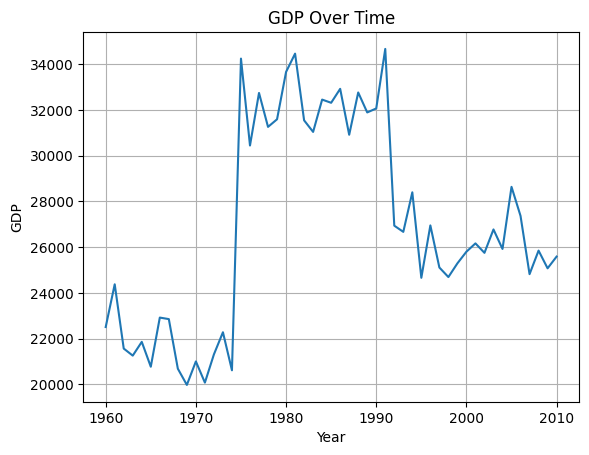

Years with comments:
    Year          GDP                               Comments
0   1960  22502.07323                      Monitoring starts
6   1966  22915.76925                   GE factory announced
10  1970  20996.58641           GE factory begins production
14  1974  20609.11441                          Major reforms
16  1976  30446.18476                             Earthquake
23  1983  31040.83076            King dies. Queen takes over
26  1986  32925.89118    Queen abdicates. Prince takes over.
28  1988  32766.53710     Oil wells discovered off the coast
30  1990  32067.53038     First oil well starts functioning.
32  1992  26937.38241        War begins with nearby kingdom.
35  1995  24656.58583  War ends. but relations are strained.
50  2010  25585.24240                        Monitoring ends


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, delimiter=';', engine='python')


plt.plot(df['Year'], df['GDP'])
plt.title("GDP Over Time")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(True)
plt.show()

print("Years with comments:")
print(df[['Year', 'GDP', 'Comments']].dropna())


#Assignment #3: Selection of representation options
In the attachments, you will find data about the geopolitical scenarios of major countries around the world. This includes names of countries, their defence budget, the nature and strength of their alliances (or conflicts) and internal political structures of those countries.



A major organization tracking warfare and peace initiatives around the world believes that devastating wars can be triggered when countries (or groups of countries) with very different political structures and with massive defence budgets becomes strongly antagonistic towards each other. Can you please represent all the data in one single succint visual graphic for the purposes of this organization?



If you have imported the data and made this graphic in any software including MS-Excel, Tableau or PowerBI, please explain your process. If you are doing this  in Python, that is very much appreciated, but is not neccessary. In either case, I would like to please see your complete submission via a single Google collab link. Please remember to give me access to this link.



Please note that the data is merely constructed for a course exercise and is not real data.

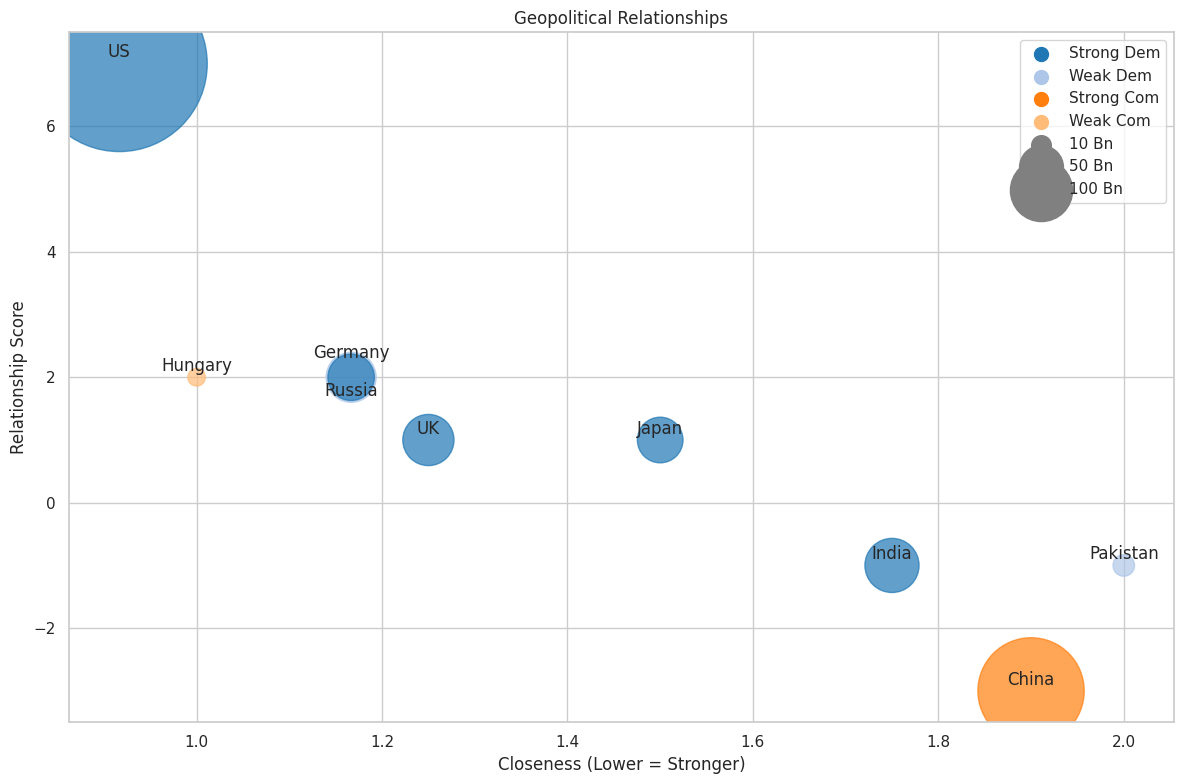

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
political_df = pd.read_csv('political_atmosphere.csv')
defence_df = pd.read_csv('defence_spending.csv')
relations_df = pd.read_csv('strategic_relations.csv')

df = pd.merge(political_df, defence_df, on='Country')

rel_score = dict.fromkeys(df['Country'], 0)
close_score = dict.fromkeys(df['Country'], 0)
counts = dict.fromkeys(df['Country'], 0)

scores = {
    'Strong Allies': (2, 0.5), 'Weak Allies': (1, 1),
    'Strong Adversary': (-2, 3), 'Weak Adversary': (-1, 2)
}

for _, row in relations_df.iterrows():
    c1, c2, rel = row['Country A'], row['Country B'], row['Relation']
    if rel in scores:
        r, c = scores[rel]
        rel_score[c1] += r
        rel_score[c2] += r
        close_score[c1] += c
        close_score[c2] += c
        counts[c1] += 1
        counts[c2] += 1

df['Rel_Score'] = df['Country'].map(rel_score)
df['Close_Score'] = df['Country'].map(lambda c: close_score[c] / counts[c] if counts[c] > 0 else 0)

plt.figure(figsize=(12, 8))
plt.scatter(
    df['Close_Score'],
    df['Rel_Score'],
    s=df['Defence Spending (bn $)'] * 20,
    c=df['Political Atmosphere'].map({
        'Strong democracy': '#1f77b4', 'Weak democracy': '#aec7e8',
        'Strong communism': '#ff7f0e', 'Weak communism': '#ffbb78'
    }),
    alpha=0.7
)

for _, row in df.iterrows():
    offset = 0.3 if row['Country'] == 'Germany' else -0.3 if row['Country'] == 'Russia' else 0.1
    plt.text(row['Close_Score'], row['Rel_Score'] + offset, row['Country'], ha='center')

plt.xlabel('Closeness (Lower = Stronger)')
plt.ylabel('Relationship Score')
plt.title('Geopolitical Relationships')

handles = [
    plt.scatter([], [], c=c, s=100, label=l)
    for c, l in [('#1f77b4', 'Strong Dem'), ('#aec7e8', 'Weak Dem'),
                 ('#ff7f0e', 'Strong Com'), ('#ffbb78', 'Weak Com')]
] + [
    plt.scatter([], [], s=s*20, c='gray', label=f'{s} Bn')
    for s in [10, 50, 100]
]
plt.legend(handles=handles, bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

#Assignment #4: Transformation of visual information

In a particular research organization, the flow of data is controlled very tightly.  There are three classes of data: Commercial, Technical and Personal. The team of researchers working there have been clearly instructed on what kind of data can be provided to which person. Any person X can request any person Y for any type of data. However, the requested person Y should only provide data to person X if the person Y is indeed permitted to provide that specific class of data to person X.



I personally went and asked a few associate on what kind of data s/he is permitted to provide to a few other persons. The summary of information is available in the attachment. Please note that we do not have data for every single pair of persons. That is intentional.  If the data is not provided for a particular pair of persons, it merely means that data is unavailable. It does not mean that the data transfer is permitted or denied by default.



How would you represent this data visually? What conclusions can you draw from this data?

- Personal Data:
  - Only Jenny receives Personal data from multiple individuals (McMohan, Phillips, Sunny, Tommy, Robert, Andreas).

- Commercial Data:
  - Katrina, John, Tommy, Robert, and Sunny receive Commercial data; McMohan, Phillips, and Andreas share it widely.

- Technical Data:
  - John, Sunny, Tommy, Robert, Andreas, and Phillips share

- Technical data mutually:
  - McMohan has limited access.

- ALL/ANY Data:
  - No one is allow to talk about all/any data this would go against the company rules.

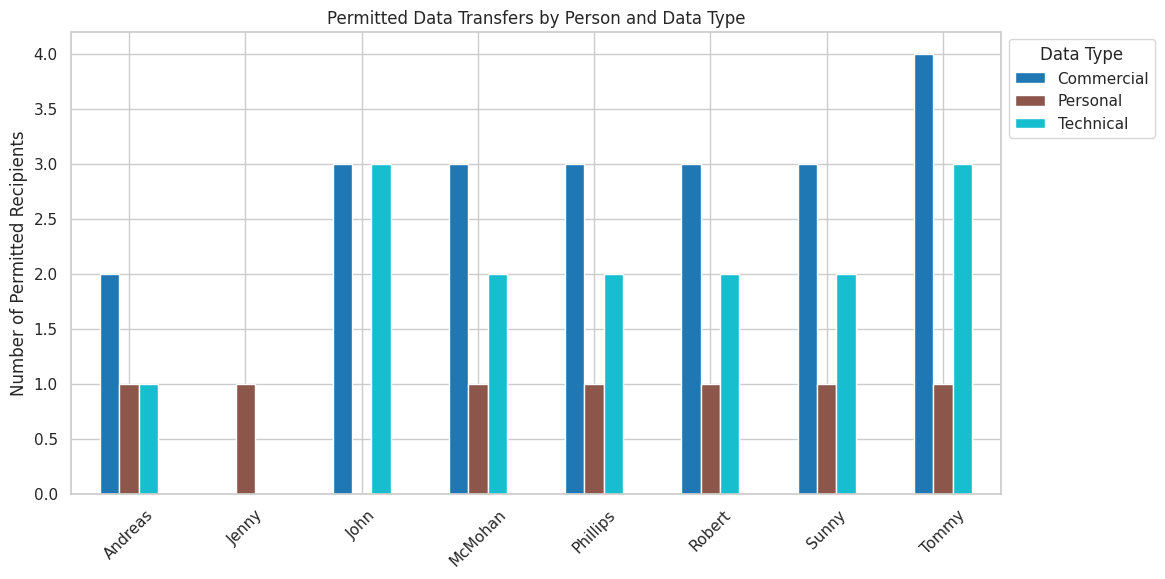

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = 'Data Transfer requests permitted or Denied.csv'
df = pd.read_csv(file_name)

df.columns = ['From', 'To', 'DataType', 'Permitted']
df['DataType'] = df['DataType'].str.strip()
df['Permitted'] = df['Permitted'].str.strip().str.lower().map({'yes': 1, 'no': 0})


df_permitted = df[df['Permitted'] == 1]


permission_counts = df_permitted.groupby(['From', 'DataType']).size().unstack(fill_value=0)

sns.set(style="whitegrid")

ax = permission_counts.plot(kind='bar', figsize=(12, 6), colormap='tab10')

plt.title("Permitted Data Transfers by Person and Data Type")
plt.xlabel("")
plt.ylabel("Number of Permitted Recipients")
plt.xticks(rotation=45)
plt.legend(title="Data Type", bbox_to_anchor=(1, 1))

plt.show()

#Assignment #5: Developing graphics for a web page (news item)

Kindly see the web page at the following link:  https://www.newsweek.com/millennials-gen-z-workplace-pronouns-emails-1797270



This news article does NOT currently include any graphics or visualization. Can you please suggest the minimal well-representative graphical visualization that best captures the gist of this news item. Please note that I am asking you for only one or two charts/plots or graphics. Your  charts/plots/graphics need not capture every single word/concept from the news article. Your  charts/plots/graphics should best represent the core message in the news article.



For this assignment, I will accept image (jpg or png) images uploaded as answers directly. If you can, I will prefer (and give better grades) if you provide Python code (in a google collab notebook) that fully generates the graphics. It is OK for the values to be hardcoded in your code.

This is a very simple representation of the data provided in the article that would have made the article much more informative.

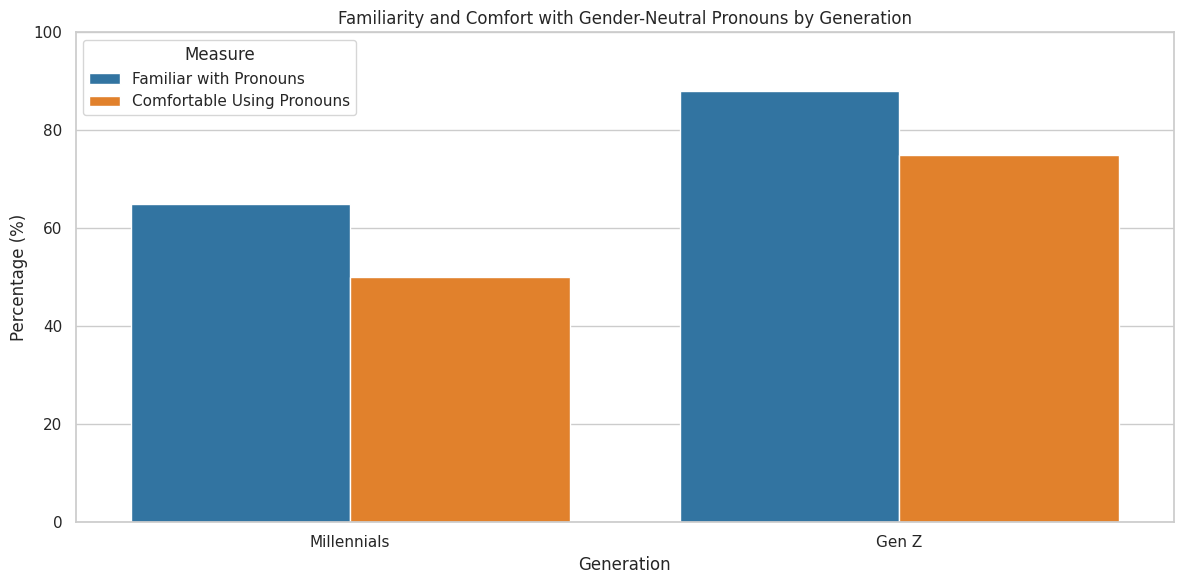

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Generation': ['Millennials', 'Gen Z'],
    'Familiar with Pronouns': [65, 88],
    'Comfortable Using Pronouns': [50, 75]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")

df_melted = df.melt(id_vars='Generation', var_name='Measure', value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Generation', y='Percentage', hue='Measure', palette='tab10')

plt.title("Familiarity and Comfort with Gender-Neutral Pronouns by Generation")
plt.ylabel("Percentage (%)")
plt.xlabel("Generation")
plt.ylim(0, 100)

plt.tight_layout()

plt.show()


#Assignment #6: Finding outliers in share market data


This assignment concerns the central share market of a small country is facing a problem. An analyst named William is suspected that one specific share trader named Elizabeth is manipulating/hacking the share trading software to make share trades in unusual ways. The only data available to William is about the hourly prices of shares traded. No other information is available to William. The only known indicator of any manipulated distortion (in the share market) is the presence of extreme outliers of share prices that are substantially distant from the share prices of that specific day.

William has arranged a meeting with the presidential body of the share market. In this meeting, William wants to show that something unusual is happening. If he can show anything suspicious, then more investigations will be performed and more data will be provided to him. William is asking for your help in effectively visualizing this data through a sensible graphic.

Hourly benchmark share prices for one week are provided. Elizabeth did substantial trading on 14th and 18th April only. She was practically inactive on other days.

Can you suggest any suitable graphics that helps visualize any notable oddities or suspicious peculiarities in this data?

When talking about shares and stocks one of the most used charts is the candlestick chart, thats why i suggest using that.

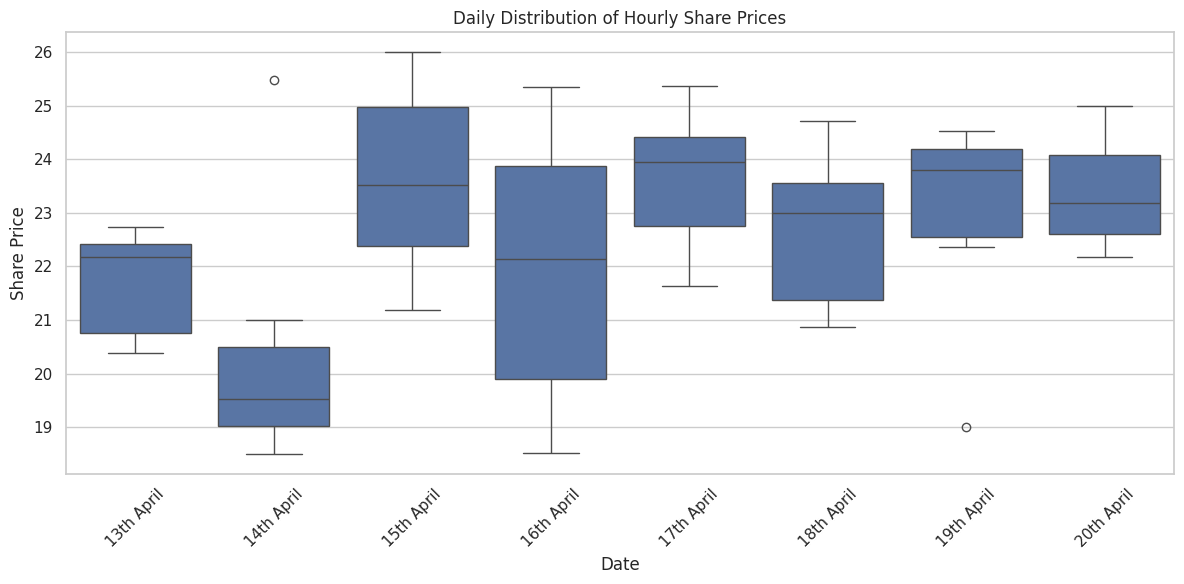

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

file_path = 'Share Price data for Assignment regarding Manipulation.xlsx'
df = pd.read_excel(file_path, skiprows=3)

df = df.drop(columns=['Unnamed: 0'])

df.columns = ['Date', '09:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30']

df.dropna(subset=['Date'], inplace=True)

df_long = df.melt(id_vars='Date', var_name='Hour', value_name='Price')

df_long.dropna(subset=['Price'], inplace=True)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Date', y='Price')

plt.title("Daily Distribution of Hourly Share Prices")
plt.xlabel("Date")
plt.ylabel("Share Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Assignment #7: Python programming basics

This assignment requires you to extract and utilize data from a csv file. The file has two columns “Number” and “Type”. If the “Type” of a specific row states “NEGLECT” you should neglect that specific row from all further computations. If the “Number” in any specific row is a prime number, you should neglect that specific row from all further computations. For all remaining non-prime and non-NEGLECT rows, kindly sort the rows in terms of the “Number” and print out the results on the console.

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

def is_prime(n):
  if n < 2:
    return False

  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True

df = pd.read_csv(filename, delimiter=',', engine='python')
df = df[df['Type'] != 'NEGLECT']
df = df[~df['Number'].apply(is_prime)]
df = df.sort_values(by='Number')

print("Sorted non-prime, non-NEGLECT rows:")
for index, row in df.iterrows():
  print(f" Number: {row['Number']}, Type: {row['Type']}")

Saving Data for Assignment on Python Programming Pandas.csv to Data for Assignment on Python Programming Pandas (5).csv
Sorted non-prime, non-NEGLECT rows:
 Number: 1, Type: MAIN
 Number: 1, Type: MAIN
 Number: 4, Type: MINOR
 Number: 4, Type: MINOR
 Number: 6, Type: MAIN
 Number: 8, Type: MINOR
 Number: 8, Type: MAIN
 Number: 38, Type: MINOR
 Number: 38, Type: MINOR
 Number: 38, Type: MAIN
 Number: 62, Type: MINOR
 Number: 66, Type: MINOR
 Number: 78, Type: MAIN
